In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data/kc_cleaned_data.csv')

In [4]:
df.drop(columns=['id', 'date'], inplace=True)
df = df.loc[df['bedrooms']< 6]
df = df.loc[df['bedrooms']>0]
df = df.loc[df['price']< 3_000_000]
df = df.loc[df['bathrooms']< 4]
df = df.loc[df['bathrooms'] > 1]

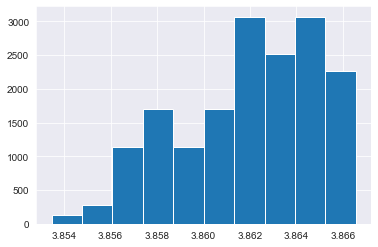

In [5]:
log_lat= np.log(df['lat'])
plt.hist(log_lat)
plt.show()

In [6]:
df['lat']= log_lat

In [8]:
df['long'] = df['long'].abs()

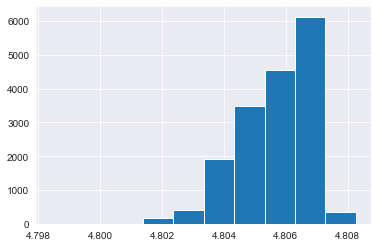

In [9]:
log_long= np.log(df['long'])
plt.hist(log_long)
plt.show()

In [10]:
df['long']=log_long

In [11]:
outcome = 'price'
x_cols = ['view', 'waterfront', 'is_cust_build', 'grade', 'yr_renovated', 'has_basement']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2997.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:10:16   Log-Likelihood:            -2.3307e+05
No. Observations:               17005   AIC:                         4.662e+05
Df Residuals:                   16998   BIC:                         4.662e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.029e+05   1.33e+04    -67.780      0.000   -9.29e+05   -8.77e+05
view           7.041e+04   2404.491     29.282      0.000    6.57e+04    7.51e+04
waterfront     3.828e+05   2.35e+04     16.292      0.000    3.37e+05    4.29e+05
is_cust_build  3.339e+05   3.31e+04     10.075      0.000    2.69e+05    3.99e+05
grade          1.779e+05   1667.197    106.684      0.000    1.75e+05    1.81e+05
yr_renovated     84.6172      4.604     18.378      0.000      75.592      93.642
has_basement   8.735e+04   3453.510     25.293      0.000    8.06e+04    9.41e+04
==============================================================================
Omnibus:                     6509.885   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45667.032
Skew:                           1.674   Prob(JB):                         0.00
Kurtosis:                      10.297   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Choices:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 2nd best 

In [ ]:
x_cols = ['view', 'waterfront', 'is_cust_build', 'grade', 'yr_renovated', 'sqft_basement'] 

In [ ]:
x_cols = ['view', 'waterfront', 'is_cust_build', 'grade', 'yr_renovated', 'sqft_basement', 'sqft_lot']

In [ ]:
x_cols = ['view', 'waterfront', 'is_cust_build', 'grade', 'yr_renovated', 'has_basement']

In [ ]:
# 3rd best

In [ ]:
['view', 'waterfront', 'has_basement', 'is_cust_build', 'grade', 'yr_renovated', ]

# 1st Model:


In [33]:
X = df[['view', 'waterfront', 'has_basement', 'is_cust_build', 'grade', 'yr_renovated', ]]
y = df['price']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
ols = LinearRegression(fit_intercept=False, normalize=False)

In [36]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [37]:
ols.score(X_train, y_train)

0.38429378957392946

In [38]:
ols.score(X_test, y_test)

0.37509923898809405